# Première analyse sur la table
## Exemple pour la région l'Île de France

L'idée est de se faire la main sur le jeu de données pour comprendre nos données et mieux les appréhender pour la suite du projet.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas as gdp
from shapely.geometry import shape
from shapely.geometry import Point
from shapely import wkt

import missingno as msno 

In [168]:
df= pd.read_csv("data/final_csv/dvf_part_4.csv")

In [169]:
# We only keep Mutation done at Paris
df= df[df["coddep"] == 75].reset_index(drop= True)

### Ca ressemble à quoi ?

In [170]:
print(df.shape)
df.tail()

(246357, 64)


,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,nbartcgi,l_artcgi,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,l_dcnt,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,geometry_x,geometry_y,geometry
246352,5871270,a4ee5e22511f6a68288675752a86eea5,a4ee5e22511f6a68288675752a86eea5,1,NaN,NaN,2014-02-13,2014,2,75,Vente,0,NaN,f,145000.0,1,1,1,{75113},1,{BL},1,{75113000BL0073},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751130007274414_0},0,1,0,0,1,0,0,0,0,0,0,0,0,0,16,0,16,0,16,0,0,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (653718.7827602237 6859086.169799382),"POLYGON ((653672.2105109112 6859073.037518763,...",NaN
246353,5854812,2ed0cf97b97d02a9ce43522ea5bb8998,2ed0cf97b97d02a9ce43522ea5bb8998,1,NaN,NaN,2014-02-14,2014,2,75,Vente,0,NaN,f,50000.0,1,2,1,{75108},1,{BQ},1,{75108000BQ0037},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,2,"{751080007254445_0,751080007254446_0}",0,1,1,0,1,0,0,0,0,0,0,0,0,0,33,0,33,0,33,0,0,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (650464.9479990336 6863373.683294674),"POLYGON ((650456.8229041555 6863378.03985093, ...",NaN
246354,5306485,14e513578f7ed95bbc251224395da8e2,14e513578f7ed95bbc251224395da8e2,1,NaN,NaN,2018-09-07,2018,9,75,Vente,0,NaN,f,662000.0,1,2,1,{75117},1,{CP},1,{75117000CP0030},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751170006522082_0},0,1,0,0,0,0,1,0,0,0,0,0,0,0,54,0,54,0,0,0,54,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (650155.7500707292 6865278.621543596),"POLYGON ((650142.768022956 6865299.867151281, ...",NaN
246355,5494579,fa5fdaa2e57a251b1ff7ce2511e6a53a,fa5fdaa2e57a251b1ff7ce2511e6a53a,1,NaN,NaN,2017-02-27,2017,2,75,Vente,0,NaN,f,570300.0,1,3,1,{75117},1,{CB},1,{75117000CB0026},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,2,"{751170006729032_0,751170006729033_0}",0,1,1,0,0,0,1,0,0,0,0,0,0,0,71,0,71,0,0,0,71,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (649066.3295190943 6865904.291919906),"POLYGON ((649057.401941884 6865883.19720453, 6...",NaN
246356,5747163,88431563d203945772fb7ab2ea7b2d26,88431563d203945772fb7ab2ea7b2d26,1,NaN,NaN,2015-06-17,2015,6,75,Vente,0,NaN,f,60000.0,1,2,1,{75112},1,{AS},1,{75112000AS0028},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751120007092551_0},0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,UNE DEPENDANCE,POINT (656212.0871886015 6859954.244069012),"POLYGON ((656180.4016221608 6859931.225708551,...",NaN


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246357 entries, 0 to 246356
Data columns (total 64 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   idmutation  246357 non-null  int64  
 1   idmutinvar  246357 non-null  object 
 2   idopendata  246357 non-null  object 
 3   idnatmut    246357 non-null  int64  
 4   codservch   0 non-null       float64
 5   refdoc      0 non-null       float64
 6   datemut     246357 non-null  object 
 7   anneemut    246357 non-null  int64  
 8   moismut     246357 non-null  int64  
 9   coddep      246357 non-null  int64  
 10  libnatmut   246357 non-null  object 
 11  nbartcgi    246357 non-null  int64  
 12  l_artcgi    0 non-null       float64
 13  vefa        246357 non-null  object 
 14  valeurfonc  246219 non-null  float64
 15  nbdispo     246357 non-null  int64  
 16  nblot       246357 non-null  int64  
 17  nbcomm      246357 non-null  int64  
 18  l_codinsee  246357 non-null  object 
 19  nb

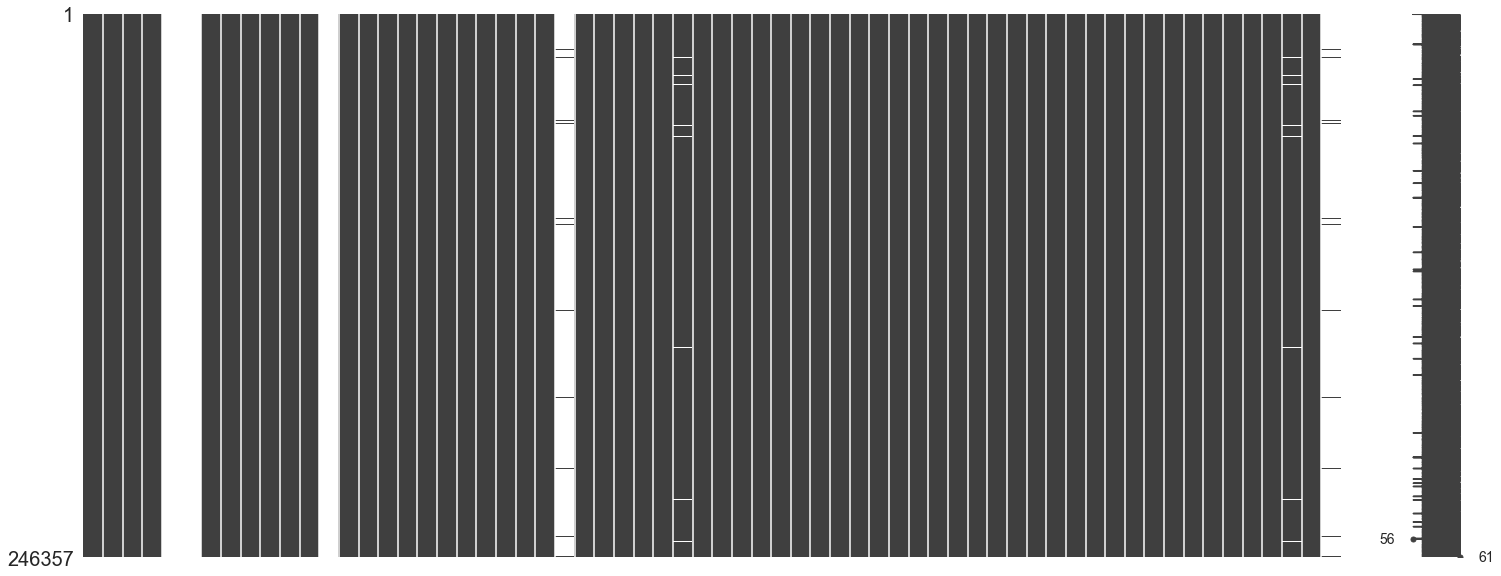

In [172]:
msno.matrix(df)
plt.show()

In [173]:
assert df["idmutation"].nunique() == df.shape[0]

In [174]:
df["datemut"]= pd.to_datetime(df["datemut"], format= "%Y-%m-%d")

print("Date min de mutation {}".format(df["datemut"].min()))
print("Date min de mutation {}".format(df["datemut"].max()))

Date min de mutation 2014-01-02 00:00:00
Date min de mutation 2019-12-31 00:00:00


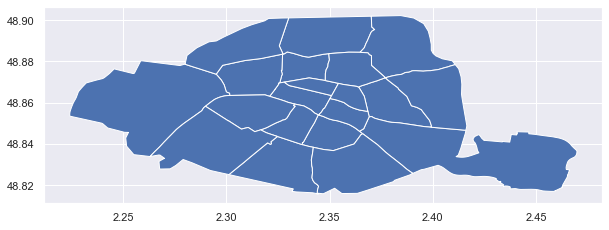

In [175]:
paris= gdp.read_file("data/map/paris/arrondissements.shp")

paris.plot(figsize= (10, 10))
plt.show()

In [176]:
paris

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geometry
0,750000009.0,9.0,75109.0,9Ã¨me Ardt,OpÃ©ra,750001537.0,2.178303e+06,6471.588290,"POLYGON ((2.33978 48.88203, 2.33982 48.88202, ..."
1,750000018.0,18.0,75118.0,18Ã¨me Ardt,Buttes-Montmartre,750001537.0,5.996051e+06,9916.464176,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ..."
2,750000001.0,1.0,75101.0,1er Ardt,Louvre,750001537.0,1.824613e+06,6054.936862,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
3,750000002.0,2.0,75102.0,2Ã¨me Ardt,Bourse,750001537.0,9.911537e+05,4554.104360,"POLYGON ((2.35152 48.86443, 2.35095 48.86341, ..."
4,750000019.0,19.0,75119.0,19Ã¨me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,"POLYGON ((2.38943 48.90122, 2.39014 48.90108, ..."
5,750000011.0,11.0,75111.0,11Ã¨me Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
6,750000005.0,5.0,75105.0,5Ã¨me Ardt,PanthÃ©on,750001537.0,2.539375e+06,6239.195396,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."
7,750000008.0,8.0,75108.0,8Ã¨me Ardt,ÃlysÃ©e,750001537.0,3.880036e+06,7880.533268,"POLYGON ((2.32584 48.86956, 2.32569 48.86954, ..."
8,750000012.0,12.0,75112.0,12Ã¨me Ardt,Reuilly,750001537.0,1.631478e+07,24089.666298,"POLYGON ((2.41388 48.83357, 2.41401 48.83357, ..."
9,750000004.0,4.0,75104.0,4Ã¨me Ardt,HÃ´tel-de-Ville,750001537.0,1.600586e+06,5420.908434,"POLYGON ((2.36851 48.85573, 2.36900 48.85374, ..."


In [177]:
# Get the CRS
no= gdp.read_file("data/unziped_csv/r03/r03_mutation_geompar.shp")
no.crs
del no

mut_crs= {'init': 'epsg:2972'}
paris_crs= paris.crs
# paris= paris.to_crs(mut_crs["init"].upper())

In [191]:
df_copy= df.copy()
df_copy= df_copy.drop(columns= "geometry")
df_copy["geometry"]= df_copy["geometry_y"]
df_copy= df_copy.drop(columns= "geometry_y")

# Transform str to geometry object
df_copy["geometry"]= df_copy["geometry"].apply(lambda x: wkt.loads(x) if isinstance(x, str) \
                                               else Point(0, 0))
df_geo= gdp.GeoDataFrame(df_copy)
df_geo["geometry"]= np.where(df_geo["geometry"] == Point(0, 0), np.nan, df_geo["geometry"])

# change our CRS
df_geo.crs= mut_crs

del df_copy
df_geo_copy= df_geo.copy()

In [192]:
pd.set_option('display.max_columns', None)
df_geo_copy["l_codinsee"].unique()

array(['{75115}', '{75118}', '{75101}', '{75113}', '{75111}', '{75116}',
       '{75117}', '{75119}', '{75110}', '{75103}', '{75106}', '{75120}',
       '{75109}', '{75104}', '{75105}', '{75102}', '{75107}', '{75108}',
       '{75114}', '{75112}', '{75105,75106}', '{75119,75120}',
       '{75103,75108}', '{75109,75110}', '{75101,75103}', '{75111,75112}',
       '{75102,75104}', '{75101,75108}', '{75105,75107}', '{75106,75107}'],
      dtype=object)

In [193]:
print(df_geo_copy["l_codinsee"].unique())
# Some mutation appears in two arrondissement, so we created 2 columns, the second with a different
# value if it has two arrondissement
df_geo_copy["arr1"]= df_geo_copy["l_codinsee"].str.replace("{", "").str.replace("}", "").str[:5].apply(int)

df_geo_copy["arr2"]= df_geo_copy["l_codinsee"].str.replace("{", "").str.replace("}", "")\
.apply(lambda x: int(x[6:]) if len(x) > 6 else int(x[:5]))

print((df_geo_copy["arr1"] != df_geo_copy["arr2"]).sum())

['{75115}' '{75118}' '{75101}' '{75113}' '{75111}' '{75116}' '{75117}'
 '{75119}' '{75110}' '{75103}' '{75106}' '{75120}' '{75109}' '{75104}'
 '{75105}' '{75102}' '{75107}' '{75108}' '{75114}' '{75112}'
 '{75105,75106}' '{75119,75120}' '{75103,75108}' '{75109,75110}'
 '{75101,75103}' '{75111,75112}' '{75102,75104}' '{75101,75108}'
 '{75105,75107}' '{75106,75107}']
79


In [194]:
# merge paris geometry into mutation dataset with arrondissement as a key
paris["c_arinsee"]= paris["c_arinsee"].apply(int)

for i in range(2):
    df_geo_copy= df_geo_copy.merge(paris[["c_arinsee", "geometry"]], how= "left"
                                   , left_on= "arr{}".format(i+1), right_on= "c_arinsee"
                                   , suffixes= (None, "a{}".format(i+1)))
    df_geo_copy= df_geo_copy.drop(columns= ["c_arinsee"], inplace= False)

In [195]:
df_geo_copy

,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,nbartcgi,l_artcgi,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,l_dcnt,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,geometry_x,geometry,arr1,arr2,geometrya1,geometrya2
0,5863434,6db153bc881f7f65454f7ee39728a06c,6db153bc881f7f65454f7ee39728a06c,1,NaN,NaN,2014-05-13,2014,5,75,Vente,0,NaN,f,3.533931e+07,1,0,1,{75115},1,{ER},1,{75115000ER0123},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,BATI - INDETERMINE : Vente avec volume(s),NaN,"POLYGON ((647392.530 6860423.192, 647399.522 6...",75115,75115,"POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...","POLYGON ((2.29932 48.85217, 2.30088 48.85118, ..."
1,5454034,1791301cde144e9854412489de4c1d14,1791301cde144e9854412489de4c1d14,1,NaN,NaN,2017-03-07,2017,3,75,Vente,0,NaN,f,2.070000e+05,1,3,1,{75118},1,{BU},1,{75118000BU0076},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751180006735170_0},0,1,0,0,0,0,1,0,0,0,0,0,0,0,39,0,39,0,0,0,39,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (652284.8733060149 6865788.974082989),"POLYGON ((652275.972 6865780.533, 652274.406 6...",75118,75118,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...","POLYGON ((2.36580 48.88554, 2.36469 48.88437, ..."
2,5473270,8227f4dadd6aec370b48546f8df6705f,8227f4dadd6aec370b48546f8df6705f,1,NaN,NaN,2017-08-28,2017,8,75,Vente,0,NaN,f,5.920000e+05,1,1,1,{75101},1,{AL},1,{75101000AL0008},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751010006689148_0},0,0,0,1,0,0,0,0,0,0,0,0,0,0,50,0,0,50,0,0,0,0,0,0,0,0,0,0,14,ACTIVITE,POINT (651760.8812060849 6862066.65975289),"POLYGON ((651760.222 6862081.027, 651767.283 6...",75101,75101,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...","POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
3,5183819,94a21f1c1cce2336e421e85169b54338,94a21f1c1cce2336e421e85169b54338,1,NaN,NaN,2019-11-27,2019,11,75,Vente,0,NaN,f,2.200000e+05,1,2,1,{75115},1,{CS},1,{75115000CS0085},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751150006301989_0},0,1,0,0,0,1,0,0,0,0,0,0,0,0,21,0,21,0,0,21,0,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (649736.7431542403 6860611.292861811),"POLYGON ((649731.270 6860613.898, 649738.601 6...",75115,75115,"POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...","POLYGON ((2.29932 48.85217, 2.30088 48.85118, ..."
4,5737461,4b91cd50ffc5bb67fb9f5de2b9c6c8c6,4b91cd50ffc5bb67fb9f5de2b9c6c8c6,1,NaN,NaN,2015-01-28,2015,1,75,Vente,0,NaN,f,2.040000e+08,1,0,1,{75113},1,{CF},1,{75113000CF0027},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,BATI - INDETERMINE : Vente avec volume(s),NaN,"POLYGON ((654327.743 6859029.517, 654371.230 6...",75113,75113,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...","POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246352,5871270,a4ee5e22511f6a68288675752a86eea5,a4ee5e22511f6a68288675752a86eea5,1,NaN,NaN,2014-02-13,2014,2,75,Vente,0,NaN,f,1.450000e+05,1,1,1,{75113},1,{BL},1,{75113000BL0073},0,NaN,0,0,"{0,0,0,0,0,0,0,0,0,0,0,0,0}",0,1,{751130007274414_0},0,1,0,0,1,0,0,0,0,0,0,0,0,0,16,0,16,0,16,0,0,0,0,0,0,0,0,0,121,UN APPARTEMENT,POINT (653718.7827602237 6859086.169799382),"POLYGON ((653672.211 6859073.038, 653678.380 6...",75113,75113,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...","POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
246353,5854812,2ed0cf97b97d02a9ce43522ea5bb8998

In [196]:
print((df_geo_copy["geometrya1"] != df_geo_copy["geometrya2"]).sum())

79
